## Welcome to the `atiim` quickstarter!

`atiim` is the Area-Time Inundatation Index Model which was created to address the challenge of rapidly characterizing spatiotemporally-complex inundation patterns in dynamic systems, such as estuarine tidal-fluvial environments.


### Load packages

In [1]:
import os

import atiim

# this is atiim's built in sample data
from atiim import SampleData


### Setup data

In [2]:
# load sample data 
sample_data = SampleData()

gage_data_file = sample_data.sample_gage_data_file
dem_file = sample_data.sample_dem
basin_shp = sample_data.sample_basin_shapefile
gage_shp = sample_data.sample_gage_shapefile 

# directory to store output files
output_dir = os.path.dirname(gage_data_file)


## Exploring the gage data

In [3]:
gadf = atiim.import_gage_data(gage_data_file)

gadf.head(2)


,date_time,RECORD,TEMP_C,WL_ELEV_M
0,2008-02-01 17:15:21,8916,3.893,2.9
1,2008-02-01 18:15:21,8918,3.893,2.7


### Plot the water surface elevation time series from the gage data

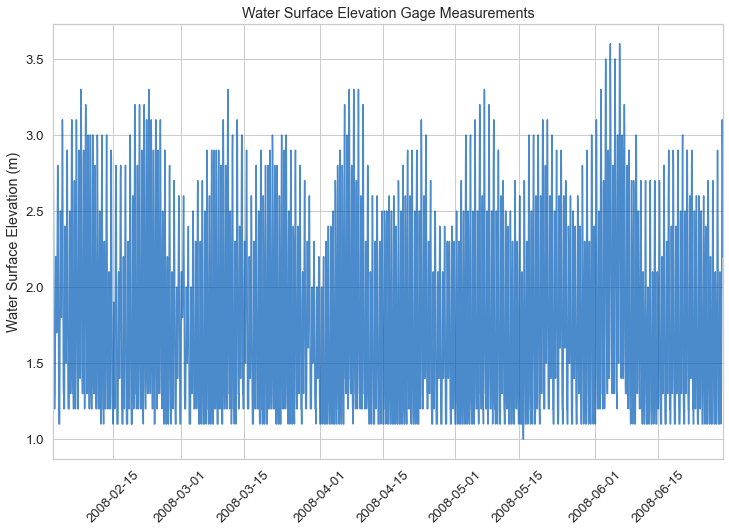

In [4]:
atiim.plot_wse_timeseries(data=gadf,
                          save_plot=False,
                          show_plot=True)


### Plot the cumulative distribution of water surface elevation from the gage data

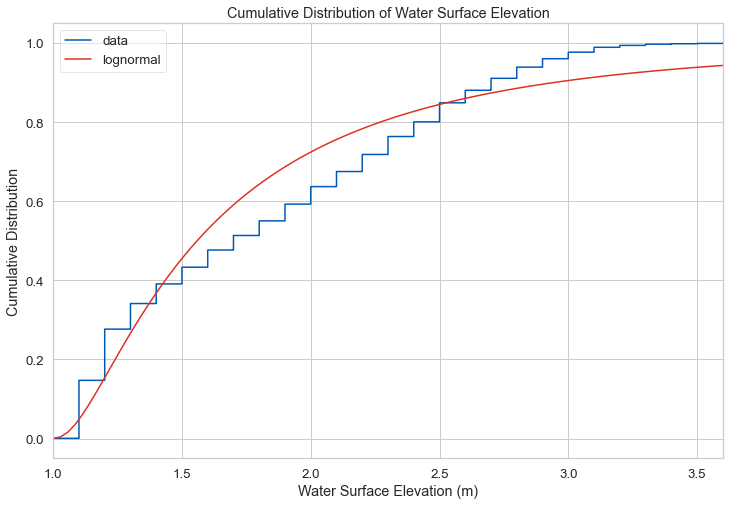

In [5]:
atiim.plot_wse_cumulative_distribution(data=gage_data_file)


### Plot the probability density of water surface elevation from the gage data

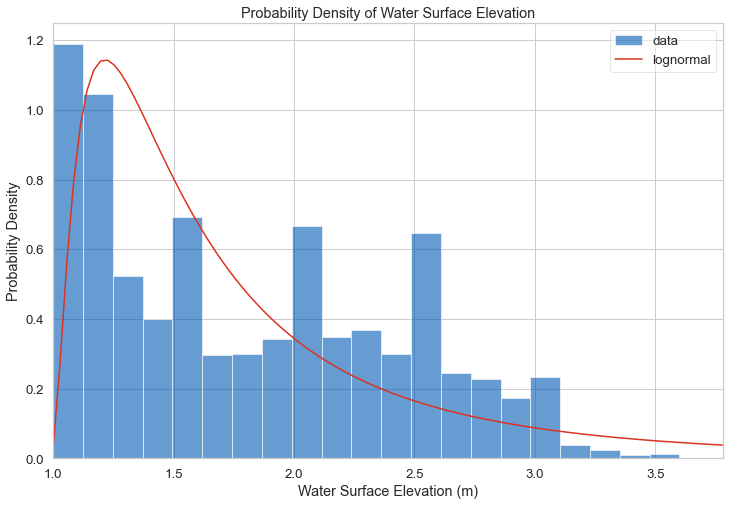

In [6]:
atiim.plot_wse_probability_density(data=gage_data_file)


### Plot the exceedance probability of water surface elevation from the gage data

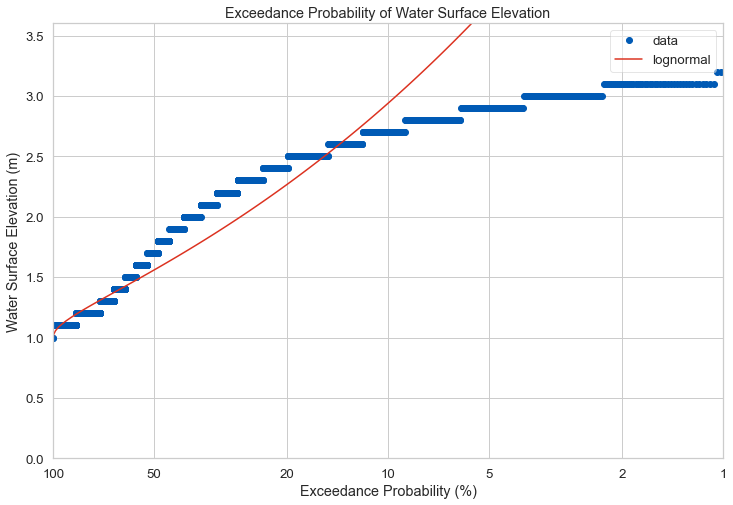

In [7]:
atiim.plot_wse_exceedance_probability(data=gage_data_file)


## Simulate and explore the area of inundation through the time series of water surface elevations

### Simulate inundation over the area of interest using the gage data

`n_jobs` can be set to run all elevation slices in parallel. Default setting is `1` to run sequentially.  See `help(atiim.simulate_inundation)` for more information.

In [8]:
%%time

df = atiim.simulate_inundation(dem_file=dem_file,
                               basin_shp=basin_shp,
                               gage_shp=gage_shp,
                               gage_data_file=gage_data_file,
                               run_name='test_1',
                               write_raster=False,
                               write_csv=False,
                               output_directory=output_dir,
                               elevation_interval=0.1,
                               hour_interval=1.0,
                               n_jobs=1,
                               verbose=True)

df.head(2)


CPU times: user 3.19 s, sys: 168 ms, total: 3.35 s
Wall time: 3.42 s


,id,frequency,elevation,area,hectares,perimeter,hect_hours,run_name
0,100,2,1.0,1785.3750,0.178538,631.5,0.357075,test_1
0,110,523,1.1,2291.0625,0.229106,642.0,119.822569,test_1


### Plot the hectare hours of inundation

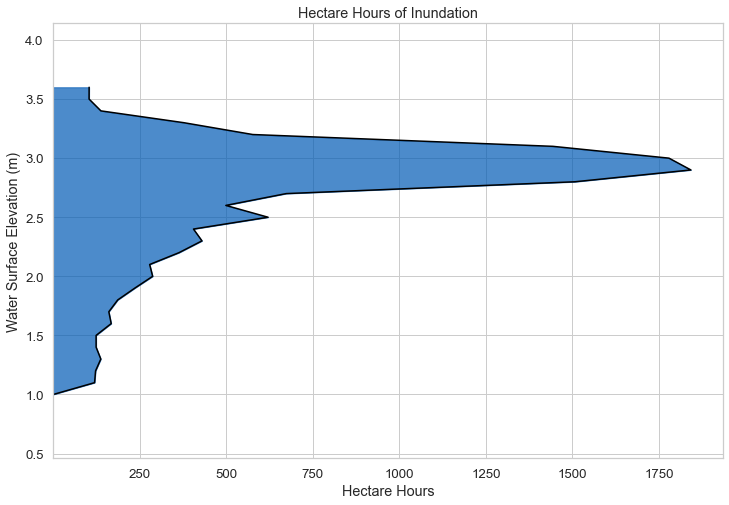

In [9]:
atiim.plot_inundation_hectare_hours(data=df)


### Plot the inundation perimeter by water surface elevation

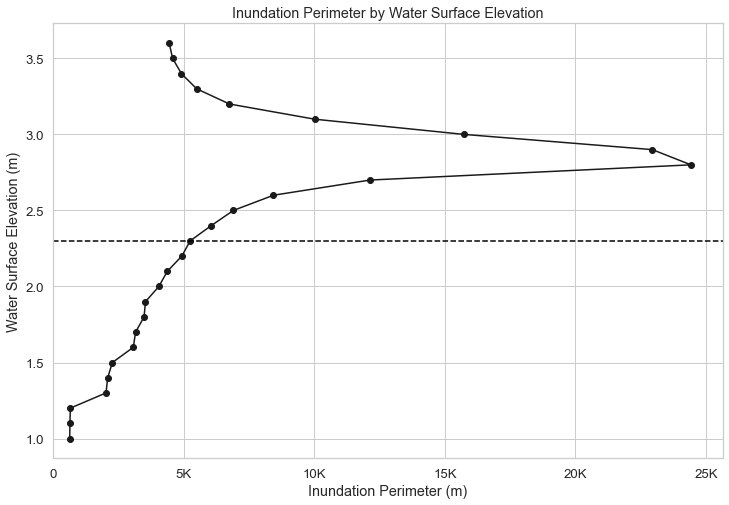

In [10]:
atiim.plot_inundation_perimeter(data=df)


### Plot the inundated area by water surface elevation with the bankfull elevation noted

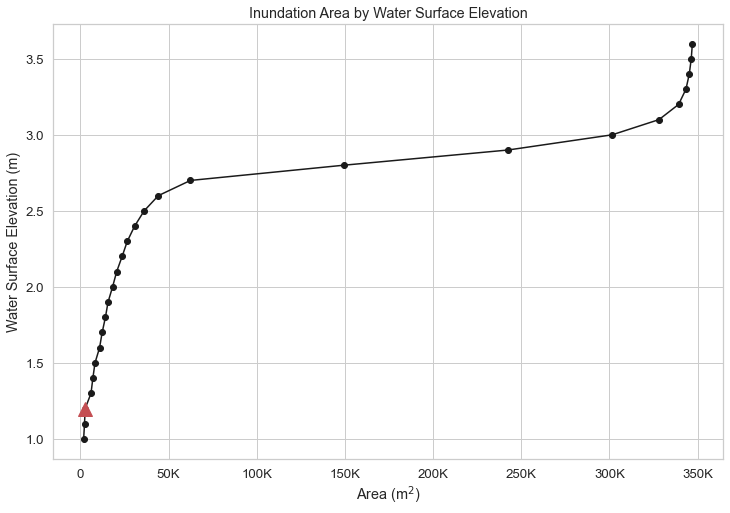

In [11]:
atiim.plot_inundation_area(data=df)


## Explore the DEM

### Generate hypsometric curve data

In [12]:
hydf = atiim.hypsometric_curve(dem_file=dem_file,
                               elevation_interval=0.1)

hydf.head(2)


,dem_elevation,dem_area_at_elevation,dem_percent_area
0,0.682365,516908.250,1.000000
1,0.782365,516598.875,0.999401


### Plot the hypsometric curve by area

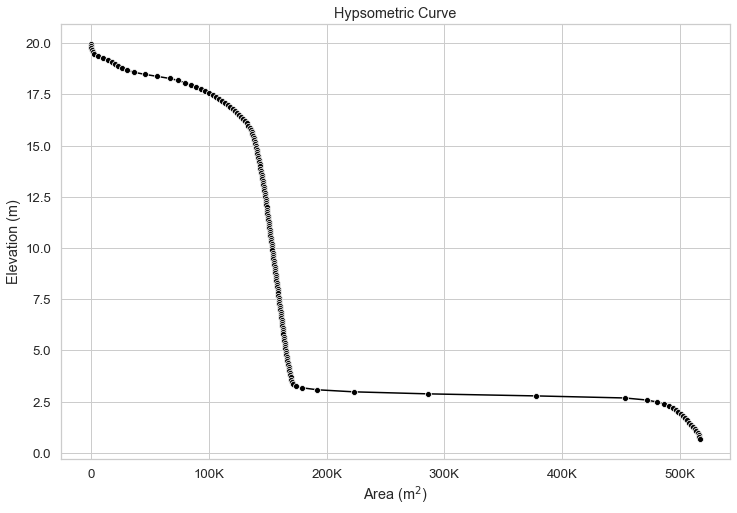

In [13]:
atiim.plot_hypsometric_curve(data=hydf)
